In [4]:
import os

os.chdir('../src')

from molecular_cloud_initialization import *

import numpy as np
import matplotlib.pyplot as plt
from amuse.community.fi.interface import Fi
from amuse.lab import Particles, nbody_system
from amuse.couple import bridge
from amuse.units import units
from amuse.community.bhtree.interface import Bhtree



In [48]:
def rel_orbital_v(mass,distance):
    return (np.abs(units.constants.G*mass/distance)).sqrt()

collision_bodies = Particles(1)
collision_bodies[0].name = "star"
collision_bodies[0].mass = 2000 |units.MSun
collision_bodies[0].radius = 20 | units.pc
collision_bodies[0].position = (1.0,0,0) * (25 | units.pc)



cloud_test = Particles(1)
cloud_test[0].name = "cloud"
cloud_test[0].mass = 2000 |units.MSun
cloud_test[0].radius = 20 | units.pc
cloud_test[0].position = (0,0,0) * (25 | units.pc)
cloud_test[0].velocity = (0,0,0) * (15 | units.kms)


collision_bodies.add_particles(cloud_test)

vorb = rel_orbital_v(collision_bodies.mass.sum(),
                     collision_bodies[0].position.sum())
print(vorb.in_(units.kms))

collision_bodies[0].velocity = (0,1,0) * vorb

converter_star=nbody_system.nbody_to_si(collision_bodies.mass.sum(), 
                                   collision_bodies[0].position.length())



gravity_code = Bhtree(converter_star)
gravity_code.particles.add_particles(collision_bodies)
channel = gravity_code.particles.new_channel_to(collision_bodies)

0.829651279543 kms


In [44]:
collision_bodies[0].position.sum().value_in(units.pc)
collision_bodies.mass.sum().value_in(units.MSun)

2002.0

In [45]:
star_position = []
cloud_position = []

t = 1000 | units.Myr
dt = 5 | units.Myr
model_time = 0 | units.Myr

while model_time < t:
    model_time += dt 

    gravity_code.evolve_model(model_time)
    channel.copy()

    star_position.append(collision_bodies[0].position.value_in(units.pc))
    cloud_position.append(collision_bodies[1].position.value_in(units.pc))
    

gravity_code.stop()


In [46]:
print(len(star_position))
print(star_position)

200
[array([ 24.84939545,   2.99538676,   0.        ]), array([ 24.40031784,   5.95483173,   0.        ]), array([ 23.66083691,   8.84347655,   0.        ]), array([ 22.64394756,  11.62854211,   0.        ]), array([ 21.36694292,  14.28016281,   0.        ]), array([ 19.85063524,  16.77200966,   0.        ]), array([ 18.11850037,  19.08168131,   0.        ]), array([ 16.19581783,  21.19086931,   0.        ]), array([ 14.1088657 ,  23.08532511,   0.        ]), array([ 11.88421196,  24.75466947,   0.        ]), array([  9.54812578,  26.19208932,   0.        ]), array([  7.12611605,  27.39396577,   0.        ]), array([  4.64259214,  28.35947054,   0.        ]), array([  2.12063431,  29.09016033,   0.        ]), array([ -0.41814322,  29.58959002,   0.        ]), array([ -2.9536548 ,  29.86295824,   0.        ]), array([ -5.46734858,  29.91679273,   0.        ]), array([ -7.94217016,  29.75867818,   0.        ]), array([-10.36249744,  29.39702608,   0.        ]), array([-12.71405718,  28.8

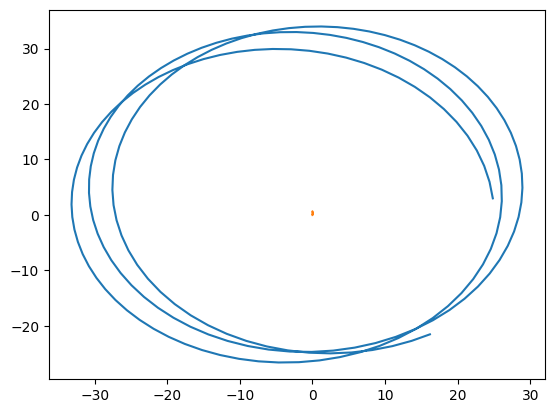

In [47]:
star_position = np.array(star_position)
cloud_position = np.array(cloud_position)

plt.plot(star_position[:,0],star_position[:,1])
plt.plot(cloud_position[:,0], cloud_position[:,1])

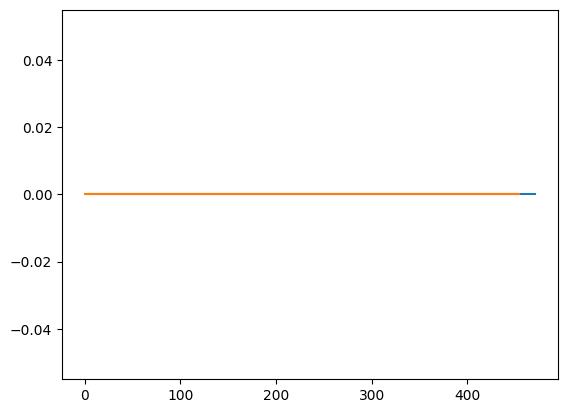

In [35]:
plt.plot(star_position[:,1],star_position[:,2])
plt.plot(cloud_position[:,1], cloud_position[:,2])